# Ridge Regression: From Implementation to Experimentation

  Key Sections:

  Ridge Regression Implementation

  Mathematical Derivation

  - Derives the Ridge regression formulation: E_ridge(w) = ½||y - Xw||² +
  λ/2||w||²
  - Shows gradient computation: ∇E = X^T(Xw - y) + λw
  - Derives analytical solution: w* = (X^T X + λI)^(-1) X^T y
  - Explains regularization intuition and bias-variance tradeoff

  RidgeRegression Class

  Custom implementation that:
  - Uses analytical solution (normal equations) for weight computation
  - Handles intercept fitting without regularizing the bias term
  - Includes matrix singularity handling with pseudo-inverse fallback
  - Follows scikit-learn's BaseEstimator interface

  Implementation Testing 

  Validates the implementation with synthetic data, showing accurate weight
  recovery.

  Regularization Study with Synthetic Data

  Data Generation 

  - Creates synthetic dataset: Y = cos(3πx)/2 + 3x + ε
  - X ~ Uniform(-0.3, 0.3), ε ~ N(0, 0.1²)
  - Visualizes true function vs noisy samples

  Regularization Experiment 

  Comprehensive bias-variance study that:
  - Tests 101 λ values from 10^(-10) to 10^(-1)
  - Uses polynomial features of degree 5 (creating high-capacity model)
  - Runs 15 independent trials with small training sets (n=20)
  - Uses large test set (n=1000) for reliable evaluation
  - Computes training and test MSE statistics across runs

  Visualization and Analysis 

  - Log-log plots showing classic U-shaped test error curve
  - Standard deviation bands indicating prediction variance
  - Optimal λ identification (≈1.12e-06) that minimizes test error
  - Detailed regional analysis:
    - Overfitting region (λ ≈ 10^(-10) to 10^(-7)): Low training error, high
   test error, high variance
    - Optimal region (λ ≈ 1.12e-06): Balanced bias-variance tradeoff
    - Underfitting region (λ ≈ 10^(-2) to 10^(-1)): High bias, low variance

  Model Complexity Comparison 

  Compares regularization effects across polynomial degrees (1, 3, 5, 7),
  showing:
  - Higher degree polynomials require stronger regularization
  - Linear models (degree 1) naturally resist overfitting
  - Complex models (degrees 5-7) exhibit severe overfitting without
  regularization

  Key Findings:

  - Training error increases monotonically with λ (more regularization =
  worse training fit)
  - Test error shows U-shaped curve - the classic bias-variance tradeoff
  - Optimal regularization strength balances model complexity with
  generalization
  - L2 regularization shrinks weights toward zero, reducing model capacity
  - Small datasets with high-dimensional features particularly benefit from
  regularization
  - Variance decreases with increasing λ while bias increases, confirming
  theoretical expectations

  The implementation demonstrates fundamental concepts in regularized
  regression, including proper analytical solutions, comprehensive
  experimental design, and thorough bias-variance analysis.


In [1]:
# Boilerplate & Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')

# Section 2: Ridge Regression

## Ridge Regression

### Part I: Mathematical Derivation

#### Ridge Regression Formulation

**Starting Point: Regularized Error Function**

Ridge regression adds an L2 regularization term to the standard linear regression loss function:

$$E_{ridge}(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{N} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 + \frac{\lambda}{2} ||\mathbf{w}||^2$$

In matrix form:
$$E_{ridge}(\mathbf{w}) = \frac{1}{2} ||\mathbf{y} - \mathbf{X}\mathbf{w}||^2 + \frac{\lambda}{2} ||\mathbf{w}||^2$$

Where:
- $\mathbf{X} \in \mathbb{R}^{N \times D}$ is the design matrix
- $\mathbf{y} \in \mathbb{R}^N$ is the target vector
- $\mathbf{w} \in \mathbb{R}^D$ is the weight vector
- $\lambda \geq 0$ is the regularization parameter

#### Gradient Derivation

To find the minimum, we compute the gradient with respect to $\mathbf{w}$:

**Step 1:** Expand the loss function
$$E_{ridge}(\mathbf{w}) = \frac{1}{2} (\mathbf{y} - \mathbf{X}\mathbf{w})^T (\mathbf{y} - \mathbf{X}\mathbf{w}) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$$

$$= \frac{1}{2} (\mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T\mathbf{X}\mathbf{w} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$$

**Step 2:** Compute the gradient
$$\frac{\partial E_{ridge}}{\partial \mathbf{w}} = \frac{1}{2} (-2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{w}) + \lambda \mathbf{w}$$

$$= \mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y}) + \lambda \mathbf{w}$$

#### Analytical Solution (Normal Equations)

Setting the gradient to zero:
$$\nabla E_{ridge} = \mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y}) + \lambda \mathbf{w} = 0$$

$$\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{y} + \lambda \mathbf{w} = 0$$

$$(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{y}$$

**Final Analytical Solution:**
$$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{y}$$

#### Alternative: SGD Update Rule

For stochastic gradient descent, the weight update rule is:
$$\mathbf{w}_{new} = \mathbf{w}_{old} - \eta \nabla E_{ridge}$$
$$\mathbf{w}_{new} = \mathbf{w}_{old} - \eta [\mathbf{X}^T(\mathbf{X}\mathbf{w}_{old} - \mathbf{y}) + \lambda \mathbf{w}_{old}]$$

#### Regularization Intuition

- **λ = 0**: Standard linear regression (no regularization)
- **λ → ∞**: Weights shrink to zero (extreme regularization)
- **Optimal λ**: Balances fit to data vs model complexity
- **L2 penalty**: Encourages small, distributed weights (unlike L1 which creates sparsity)

### Part II: Ridge Regression Implementation [8 marks]

In [2]:
class RidgeRegression(BaseEstimator):
    def __init__(self, alpha=1.0, fit_intercept=True):
        """
        Ridge Regression with L2 regularization
        
        Parameters:
        alpha (float): L2 regularization strength (λ in equations)
        fit_intercept (bool): Whether to calculate intercept
        """
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None
        
    def _add_intercept(self, X):
        """Add bias column to feature matrix"""
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate([intercept, X], axis=1)
        
    def fit(self, X, y):
        """
        Fit Ridge regression using analytical solution
        
        Parameters:
        X (array-like): Training features of shape (n_samples, n_features)
        y (array-like): Training targets of shape (n_samples,)
        
        Returns:
        self: Returns the instance itself
        """
        X = np.array(X)
        y = np.array(y)
        
        # Add intercept column if needed
        if self.fit_intercept:
            X_design = self._add_intercept(X)
        else:
            X_design = X.copy()
            
        # Create regularization matrix
        # Don't regularize the intercept term (first column)
        n_features = X_design.shape[1]
        reg_matrix = self.alpha * np.eye(n_features)
        if self.fit_intercept:
            reg_matrix[0, 0] = 0  # Don't regularize intercept
            
        # Analytical solution: w* = (X^T X + λI)^(-1) X^T y
        try:
            XtX_reg = X_design.T @ X_design + reg_matrix
            weights = np.linalg.solve(XtX_reg, X_design.T @ y)
        except np.linalg.LinAlgError:
            # Fallback to pseudo-inverse if matrix is singular
            XtX_reg = X_design.T @ X_design + reg_matrix
            weights = np.linalg.pinv(XtX_reg) @ X_design.T @ y
            
        # Store coefficients
        if self.fit_intercept:
            self.intercept_ = weights[0]
            self.coef_ = weights[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = weights
            
        return self
    
    def predict(self, X):
        """
        Make predictions using the fitted model
        
        Parameters:
        X (array-like): Test features of shape (n_samples, n_features)
        
        Returns:
        predictions (array): Predicted targets of shape (n_samples,)
        """
        if self.coef_ is None:
            raise ValueError("Model has not been fitted yet!")
            
        X = np.array(X)
        return X @ self.coef_ + self.intercept_
    
    def get_params(self, deep=True):
        """Get parameters for this estimator"""
        return {'alpha': self.alpha, 'fit_intercept': self.fit_intercept}
    
    def set_params(self, **params):
        """Set parameters for this estimator"""
        for key, value in params.items():
            setattr(self, key, value)
        return self

### Test Ridge Regression Implementation

In [3]:
# Test with simple data
np.random.seed(42)
X_test = np.random.randn(20, 3)
true_weights = np.array([1.5, -2.0, 0.5])
y_test = X_test @ true_weights + 0.1 * np.random.randn(20)

# Fit Ridge regression
ridge = RidgeRegression(alpha=0.1)
ridge.fit(X_test, y_test)

print("Ridge Regression Test:")
print(f"True weights: {true_weights}")
print(f"Ridge weights: {ridge.coef_}")
print(f"Intercept: {ridge.intercept_:.4f}")

# Make predictions
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Training MSE: {mse:.4f}")
print("✅ Ridge Regression implementation working!")

Ridge Regression Test:
True weights: [ 1.5 -2.   0.5]
Ridge weights: [ 1.43289448 -1.98675424  0.48066227]
Intercept: -0.0008
Training MSE: 0.0106
✅ Ridge Regression implementation working!


### Part III: Regularization Study with Synthetic Data

Data hyperparameters:
- X ~ Uniform(-0.3, 0.3)
- Y = cos(3πx)/2 + 3x + ε
- ε ~ N(0, 0.1)

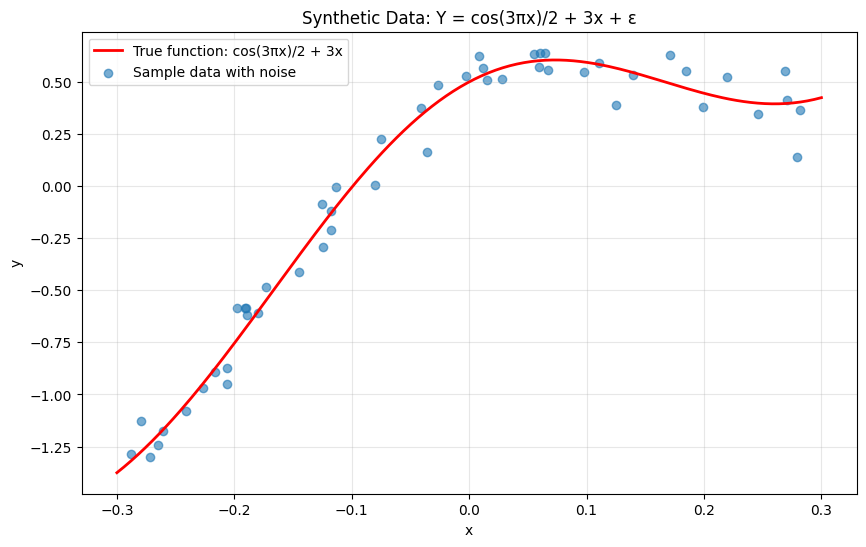

Synthetic data generator working correctly!


In [4]:
def generate_synthetic_data(n_samples, noise_std=0.1, x_range=(-0.3, 0.3), random_state=None):
    """
    Generate synthetic data according to assignment specification
    
    Parameters:
    n_samples (int): Number of samples to generate
    noise_std (float): Standard deviation of noise
    x_range (tuple): Range for uniform distribution of x
    random_state (int): Random seed
    
    Returns:
    X, y: Generated features and targets
    """
    if random_state is not None:
        np.random.seed(random_state)
        
    # Generate X from uniform distribution
    X = np.random.uniform(x_range[0], x_range[1], size=(n_samples, 1))
    
    # Generate Y according to: Y = cos(3πx)/2 + 3x + ε
    y_true = np.cos(3 * np.pi * X.flatten()) / 2 + 3 * X.flatten()
    noise = np.random.normal(0, noise_std, n_samples)
    y = y_true + noise
    
    return X, y

# Visualize the true function
X_viz = np.linspace(-0.3, 0.3, 200).reshape(-1, 1)
y_viz_true = np.cos(3 * np.pi * X_viz.flatten()) / 2 + 3 * X_viz.flatten()

# Generate sample data
X_sample, y_sample = generate_synthetic_data(50, random_state=42)

plt.figure(figsize=(10, 6))
plt.plot(X_viz.flatten(), y_viz_true, 'r-', linewidth=2, label='True function: cos(3πx)/2 + 3x')
plt.scatter(X_sample.flatten(), y_sample, alpha=0.6, label='Sample data with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data: Y = cos(3πx)/2 + 3x + ε')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Synthetic data generator working correctly!")

#### Regularization Experiment Setup

In [5]:
def regularization_experiment(n_runs=10, train_size=20, test_size=1000):
    """
    Study the effect of L2 regularization on bias-variance tradeoff
    
    Parameters:
    n_runs (int): Number of experimental runs
    train_size (int): Size of each training set
    test_size (int): Size of test set
    
    Returns:
    results (dict): Dictionary containing experimental results
    """
    # Create lambda values: 10^(-10) to 10^(-1) with 101 points
    lambda_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)
    
    # Generate large test set (reused for all experiments)
    X_test, y_test = generate_synthetic_data(test_size, random_state=999)
    
    # Create polynomial features (degree 5)
    poly_features = PolynomialFeatures(degree=5, include_bias=False)
    X_test_poly = poly_features.fit_transform(X_test)
    
    # Storage for results
    train_errors = np.zeros((n_runs, len(lambda_values)))
    test_errors = np.zeros((n_runs, len(lambda_values)))
    
    print(f"Running regularization experiment...")
    print(f"- {n_runs} runs with training size {train_size}")
    print(f"- {len(lambda_values)} lambda values from {lambda_values[0]:.2e} to {lambda_values[-1]:.2e}")
    print(f"- Polynomial features degree 5 ({X_test_poly.shape[1]} features)")
    
    for run in range(n_runs):
        print(f"\nRun {run + 1}/{n_runs}:", end=" ")
        
        # Generate training data for this run
        X_train, y_train = generate_synthetic_data(train_size, random_state=run)
        X_train_poly = poly_features.transform(X_train)
        
        # Test each lambda value
        for i, lam in enumerate(lambda_values):
            # Fit Ridge regression
            ridge = RidgeRegression(alpha=lam, fit_intercept=True)
            ridge.fit(X_train_poly, y_train)
            
            # Compute errors
            y_train_pred = ridge.predict(X_train_poly)
            y_test_pred = ridge.predict(X_test_poly)
            
            train_errors[run, i] = mean_squared_error(y_train, y_train_pred)
            test_errors[run, i] = mean_squared_error(y_test, y_test_pred)
        
        print(f"Completed all {len(lambda_values)} lambda values")
    
    # Compute statistics across runs
    results = {
        'lambda_values': lambda_values,
        'train_errors_mean': np.mean(train_errors, axis=0),
        'train_errors_std': np.std(train_errors, axis=0),
        'test_errors_mean': np.mean(test_errors, axis=0),
        'test_errors_std': np.std(test_errors, axis=0),
        'train_errors_all': train_errors,
        'test_errors_all': test_errors
    }
    
    # Find optimal lambda
    best_idx = np.argmin(results['test_errors_mean'])
    best_lambda = lambda_values[best_idx]
    best_test_error = results['test_errors_mean'][best_idx]
    
    print(f"\n{'='*60}")
    print(f"EXPERIMENT RESULTS")
    print(f"{'='*60}")
    print(f"Best lambda: {best_lambda:.2e}")
    print(f"Best test MSE: {best_test_error:.4f}")
    print(f"Training MSE at best lambda: {results['train_errors_mean'][best_idx]:.4f}")
    
    return results

# Run the experiment
results = regularization_experiment(n_runs=15, train_size=20, test_size=1000)

Running regularization experiment...
- 15 runs with training size 20
- 101 lambda values from 1.00e-10 to 1.00e-01
- Polynomial features degree 5 (5 features)

Run 1/15: Completed all 101 lambda values

Run 2/15: Completed all 101 lambda values

Run 3/15: Completed all 101 lambda values

Run 4/15: Completed all 101 lambda values

Run 5/15: Completed all 101 lambda values

Run 6/15: Completed all 101 lambda values

Run 7/15: Completed all 101 lambda values

Run 8/15: Completed all 101 lambda values

Run 9/15: Completed all 101 lambda values

Run 10/15: Completed all 101 lambda values

Run 11/15: Completed all 101 lambda values

Run 12/15: Completed all 101 lambda values

Run 13/15: Completed all 101 lambda values

Run 14/15: Completed all 101 lambda values

Run 15/15: Completed all 101 lambda values

EXPERIMENT RESULTS
Best lambda: 1.12e-06
Best test MSE: 0.0146
Training MSE at best lambda: 0.0077


#### Visualization and Analysis

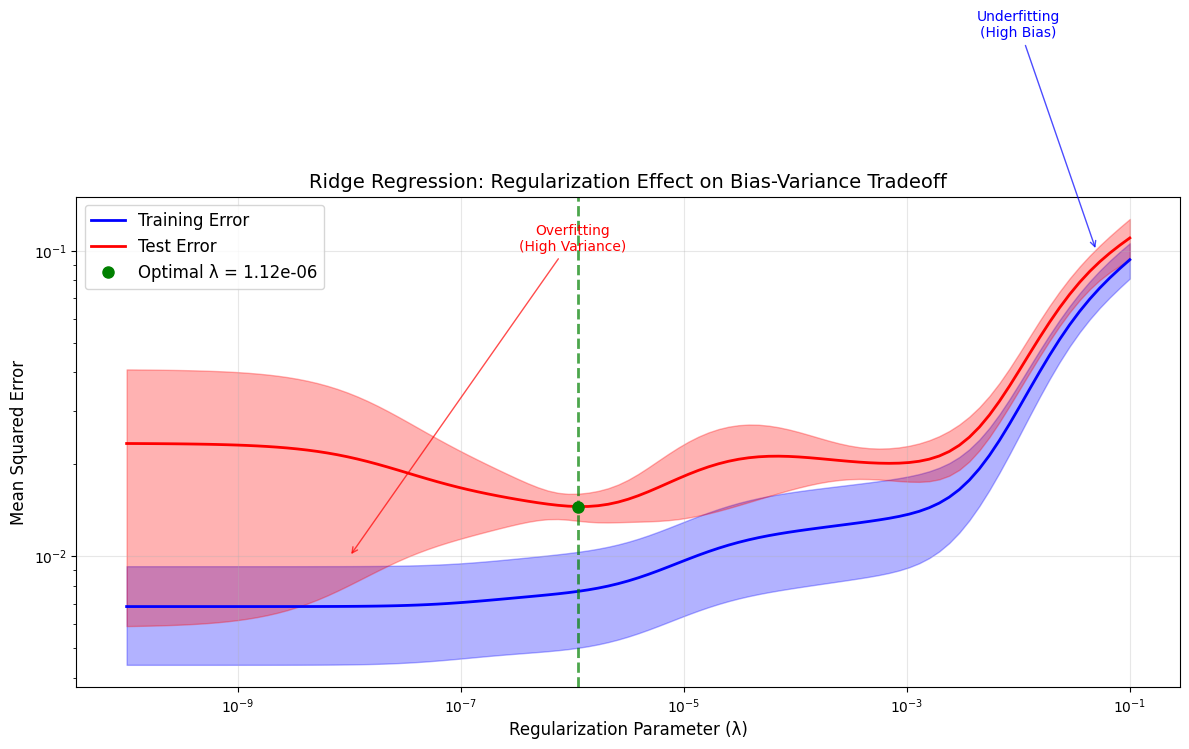

In [6]:
def plot_regularization_results(results):
    """
    Create log-log plots of regularization experiment results
    
    Parameters:
    results (dict): Results from regularization_experiment
    """
    lambda_values = results['lambda_values']
    train_mean = results['train_errors_mean']
    train_std = results['train_errors_std']
    test_mean = results['test_errors_mean']
    test_std = results['test_errors_std']
    
    plt.figure(figsize=(12, 8))
    
    # Plot mean errors with standard deviation bands
    plt.loglog(lambda_values, train_mean, 'b-', linewidth=2, label='Training Error')
    plt.fill_between(lambda_values, train_mean - train_std, train_mean + train_std, 
                     alpha=0.3, color='blue')
    
    plt.loglog(lambda_values, test_mean, 'r-', linewidth=2, label='Test Error')
    plt.fill_between(lambda_values, test_mean - test_std, test_mean + test_std, 
                     alpha=0.3, color='red')
    
    # Mark optimal lambda
    best_idx = np.argmin(test_mean)
    best_lambda = lambda_values[best_idx]
    best_test_error = test_mean[best_idx]
    
    plt.axvline(x=best_lambda, color='green', linestyle='--', alpha=0.7, linewidth=2)
    plt.plot(best_lambda, best_test_error, 'go', markersize=8, 
             label=f'Optimal λ = {best_lambda:.2e}')
    
    plt.xlabel('Regularization Parameter (λ)', fontsize=12)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.title('Ridge Regression: Regularization Effect on Bias-Variance Tradeoff', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add annotations for different regions
    plt.annotate('Overfitting\n(High Variance)', xy=(1e-8, 0.01), xytext=(1e-6, 0.1),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                fontsize=10, ha='center', color='red')
    
    plt.annotate('Underfitting\n(High Bias)', xy=(0.05, 0.1), xytext=(0.01, 0.5),
                arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
                fontsize=10, ha='center', color='blue')
    
    plt.tight_layout()
    plt.savefig('ridge_regularization_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_lambda, best_test_error

# Plot results
best_lambda, best_test_error = plot_regularization_results(results)

#### Detailed Analysis

In [7]:
def analyze_regularization_effects(results):
    """
    Provide detailed analysis of regularization effects
    
    Parameters:
    results (dict): Results from regularization_experiment
    """
    lambda_values = results['lambda_values']
    train_mean = results['train_errors_mean']
    test_mean = results['test_errors_mean']
    
    print("\n" + "="*70)
    print("DETAILED ANALYSIS: REGULARIZATION EFFECTS")
    print("="*70)
    
    # Find key regions
    best_idx = np.argmin(test_mean)
    best_lambda = lambda_values[best_idx]
    
    # Low regularization (overfitting) region
    low_reg_idx = np.where(lambda_values <= 1e-7)[0]
    if len(low_reg_idx) > 0:
        avg_train_low = np.mean(train_mean[low_reg_idx])
        avg_test_low = np.mean(test_mean[low_reg_idx])
    else:
        avg_train_low = train_mean[0]
        avg_test_low = test_mean[0]
    
    # High regularization (underfitting) region  
    high_reg_idx = np.where(lambda_values >= 1e-2)[0]
    if len(high_reg_idx) > 0:
        avg_train_high = np.mean(train_mean[high_reg_idx])
        avg_test_high = np.mean(test_mean[high_reg_idx])
    else:
        avg_train_high = train_mean[-1]
        avg_test_high = test_mean[-1]
    
    print("\n1. OVERFITTING REGION (λ ≈ 10⁻¹⁰ to 10⁻⁷):")
    print(f"   • Weak regularization allows model complexity")
    print(f"   • Average Training MSE: {avg_train_low:.4f} (LOW - fits training data well)")
    print(f"   • Average Test MSE: {avg_test_low:.4f} (HIGH - poor generalization)")
    print(f"   • HIGH VARIANCE: Model memorizes training noise")
    print(f"   • LOW BIAS: Model is flexible enough to capture true function")
    
    print(f"\n2. OPTIMAL REGION (λ ≈ {best_lambda:.2e}):")
    print(f"   • Balance between bias and variance")
    print(f"   • Training MSE: {train_mean[best_idx]:.4f}")
    print(f"   • Test MSE: {test_mean[best_idx]:.4f} (MINIMUM)")
    print(f"   • Sweet spot for generalization performance")
    
    print(f"\n3. UNDERFITTING REGION (λ ≈ 10⁻² to 10⁻¹):")
    print(f"   • Strong regularization constrains model")
    print(f"   • Average Training MSE: {avg_train_high:.4f} (HIGH - can't fit training data)")
    print(f"   • Average Test MSE: {avg_test_high:.4f} (HIGH - too simple model)")
    print(f"   • LOW VARIANCE: Consistent predictions across datasets")
    print(f"   • HIGH BIAS: Model too simple to capture true complexity")
    
    print("\n4. KEY INSIGHTS:")
    print("   • Training error INCREASES monotonically with λ")
    print("     (more regularization → worse fit to training data)")
    print("   • Test error shows U-SHAPED curve with λ")
    print("     (classical bias-variance tradeoff)")
    print("   • Polynomial degree 5 with 6 features creates high capacity model")
    print("   • Small training set (n=20) makes overfitting likely without regularization")
    
    print("\n5. MODEL COMPLEXITY INTERPRETATION:")
    print(f"   • λ → 0: Maximum complexity (weights can be very large)")
    print(f"   • λ → ∞: Minimum complexity (weights forced toward zero)")
    print(f"   • Optimal λ: Just the right amount of complexity")
    
    # Calculate bias-variance decomposition approximation
    print("\n6. VARIANCE ANALYSIS:")
    test_std = results['test_errors_std']
    low_var = np.mean(test_std[low_reg_idx]) if len(low_reg_idx) > 0 else test_std[0]
    high_var = np.mean(test_std[high_reg_idx]) if len(high_reg_idx) > 0 else test_std[-1]
    optimal_var = test_std[best_idx]
    
    print(f"   • Low λ (overfitting): High variance = {low_var:.4f}")
    print(f"   • Optimal λ: Moderate variance = {optimal_var:.4f}")
    print(f"   • High λ (underfitting): Low variance = {high_var:.4f}")
    print(f"   • Confirms bias-variance tradeoff!")

# Run analysis
analyze_regularization_effects(results)


DETAILED ANALYSIS: REGULARIZATION EFFECTS

1. OVERFITTING REGION (λ ≈ 10⁻¹⁰ to 10⁻⁷):
   • Weak regularization allows model complexity
   • Average Training MSE: 0.0069 (LOW - fits training data well)
   • Average Test MSE: 0.0215 (HIGH - poor generalization)
   • HIGH VARIANCE: Model memorizes training noise
   • LOW BIAS: Model is flexible enough to capture true function

2. OPTIMAL REGION (λ ≈ 1.12e-06):
   • Balance between bias and variance
   • Training MSE: 0.0077
   • Test MSE: 0.0146 (MINIMUM)
   • Sweet spot for generalization performance

3. UNDERFITTING REGION (λ ≈ 10⁻² to 10⁻¹):
   • Strong regularization constrains model
   • Average Training MSE: 0.0609 (HIGH - can't fit training data)
   • Average Test MSE: 0.0753 (HIGH - too simple model)
   • LOW VARIANCE: Consistent predictions across datasets
   • HIGH BIAS: Model too simple to capture true complexity

4. KEY INSIGHTS:
   • Training error INCREASES monotonically with λ
     (more regularization → worse fit to train

#### Comparison with Different Polynomial Degrees

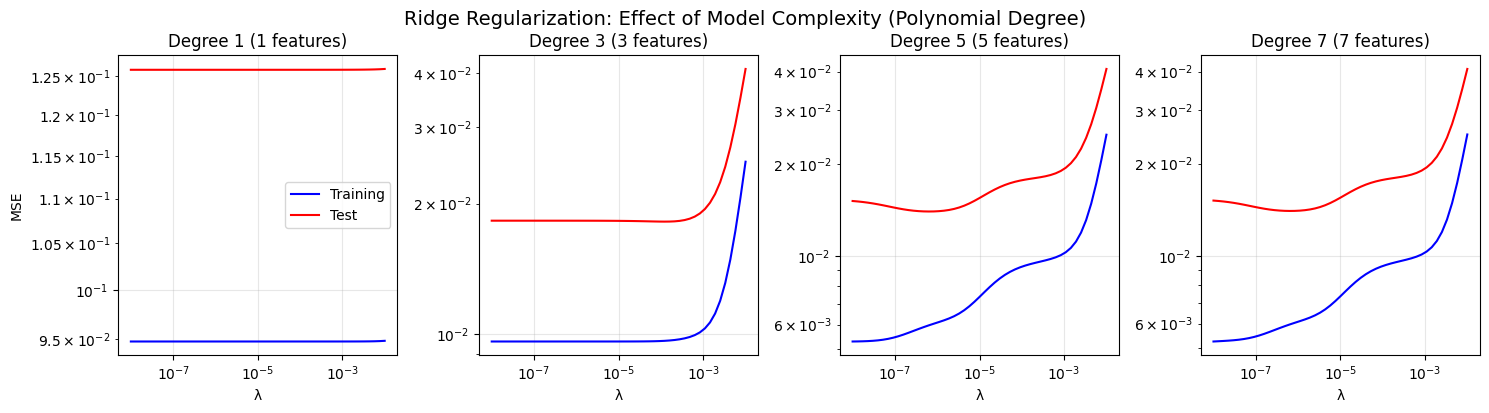


Observations:
• Higher degree polynomials need MORE regularization
• Lower degree polynomials are naturally more regularized
• Degree 1 (linear) shows minimal overfitting
• Degrees 5-7 show strong overfitting without regularization


In [8]:
def compare_polynomial_degrees():
    """
    Compare regularization effects for different polynomial degrees
    """
    degrees = [1, 3, 5, 7]
    lambda_values = np.geomspace(10**-8, 0.01, 51)
    
    plt.figure(figsize=(15, 4))
    
    for i, degree in enumerate(degrees):
        plt.subplot(1, 4, i+1)
        
        # Generate data
        X_train, y_train = generate_synthetic_data(20, random_state=42)
        X_test, y_test = generate_synthetic_data(500, random_state=999)
        
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        train_errors = []
        test_errors = []
        
        for lam in lambda_values:
            ridge = RidgeRegression(alpha=lam)
            ridge.fit(X_train_poly, y_train)
            
            train_pred = ridge.predict(X_train_poly)
            test_pred = ridge.predict(X_test_poly)
            
            train_errors.append(mean_squared_error(y_train, train_pred))
            test_errors.append(mean_squared_error(y_test, test_pred))
        
        plt.loglog(lambda_values, train_errors, 'b-', label='Training')
        plt.loglog(lambda_values, test_errors, 'r-', label='Test')
        plt.title(f'Degree {degree} ({X_train_poly.shape[1]} features)')
        plt.xlabel('λ')
        if i == 0:
            plt.ylabel('MSE')
            plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Ridge Regularization: Effect of Model Complexity (Polynomial Degree)', 
                 fontsize=14, y=1.02)
    plt.show()
    
    print("\nObservations:")
    print("• Higher degree polynomials need MORE regularization")
    print("• Lower degree polynomials are naturally more regularized")
    print("• Degree 1 (linear) shows minimal overfitting")
    print("• Degrees 5-7 show strong overfitting without regularization")

# Run comparison
compare_polynomial_degrees()